# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each month:

**Most common words** - find these and create word clouds

## Most Common Words

### Analysis

In [87]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,april,february,january,july,june,march,may
aag,0,0,0,0,1,0,0
aarefajohari,0,0,0,0,0,0,1
aayega,1,0,0,0,0,0,0
abandoned,3,0,0,0,0,0,0
abandons,0,0,0,0,0,1,0


In [88]:
# Find the top 30 words said each month
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'april': [('trump', 60),
  ('lab', 29),
  ('wuhan', 29),
  ('says', 28),
  ('seen', 28),
  ('evidence', 27),
  ('china', 24),
  ('people', 23),
  ('deaths', 22),
  ('just', 19),
  ('world', 19),
  ('like', 18),
  ('amp', 18),
  ('chinese', 17),
  ('vaccine', 16),
  ('help', 16),
  ('state', 16),
  ('health', 15),
  ('million', 15),
  ('community', 14),
  ('home', 14),
  ('hes', 14),
  ('crisis', 14),
  ('government', 13),
  ('work', 13),
  ('youtube', 13),
  ('agency', 13),
  ('month', 13),
  ('suggesting', 12),
  ('going', 12)],
 'february': [('trump', 71),
  ('people', 50),
  ('china', 35),
  ('hoax', 35),
  ('just', 30),
  ('like', 25),
  ('know', 24),
  ('outbreak', 20),
  ('flu', 19),
  ('health', 19),
  ('said', 18),
  ('pence', 16),
  ('dont', 16),
  ('update', 16),
  ('confirmed', 15),
  ('stop', 15),
  ('says', 14),
  ('cdc', 14),
  ('died', 14),
  ('bad', 14),
  ('death', 14),
  ('americans', 13),
  ('masks', 13),
  ('president', 13),
  ('media', 13),
  ('sick', 13),
  ('sta

In [89]:
# Print the top 50 words said each month
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:49]]))
    print('---')

april
trump, lab, wuhan, says, seen, evidence, china, people, deaths, just, world, like, amp, chinese, vaccine, help, state, health, million, community, home, hes, crisis, government, work, youtube, agency, month, suggesting, going
---
february
trump, people, china, hoax, just, like, know, outbreak, flu, health, said, pence, dont, update, confirmed, stop, says, cdc, died, bad, death, americans, masks, president, media, sick, state, im, good, does
---
january
china, people, flu, just, health, chinese, emergency, spread, like, wuhan, outbreak, hiv, confirmed, trump, declares, death, fears, bioweapon, zero, public, hedge, got, artificially, know, insertions, created, going, dont, stoking, contains
---
july
trump, people, deaths, just, mask, florida, like, texas, masks, state, know, brett, president, dr, fauci, york, uk, did, dont, hurricane, health, favre, outbreak, world, don, americans, amp, amid, help, tested
---
june
trump, people, deaths, just, fauci, going, china, like, day, think, 

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [90]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each month
words = []
for month in data.columns:
    top = [word for (word, count) in top_dict[month]]
    for t in top:
        words.append(t)
        
words

['trump',
 'lab',
 'wuhan',
 'says',
 'seen',
 'evidence',
 'china',
 'people',
 'deaths',
 'just',
 'world',
 'like',
 'amp',
 'chinese',
 'vaccine',
 'help',
 'state',
 'health',
 'million',
 'community',
 'home',
 'hes',
 'crisis',
 'government',
 'work',
 'youtube',
 'agency',
 'month',
 'suggesting',
 'going',
 'trump',
 'people',
 'china',
 'hoax',
 'just',
 'like',
 'know',
 'outbreak',
 'flu',
 'health',
 'said',
 'pence',
 'dont',
 'update',
 'confirmed',
 'stop',
 'says',
 'cdc',
 'died',
 'bad',
 'death',
 'americans',
 'masks',
 'president',
 'media',
 'sick',
 'state',
 'im',
 'good',
 'does',
 'china',
 'people',
 'flu',
 'just',
 'health',
 'chinese',
 'emergency',
 'spread',
 'like',
 'wuhan',
 'outbreak',
 'hiv',
 'confirmed',
 'trump',
 'declares',
 'death',
 'fears',
 'bioweapon',
 'zero',
 'public',
 'hedge',
 'got',
 'artificially',
 'know',
 'insertions',
 'created',
 'going',
 'dont',
 'stoking',
 'contains',
 'trump',
 'people',
 'deaths',
 'just',
 'mask',
 'fl

In [91]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('trump', 7),
 ('people', 7),
 ('just', 7),
 ('like', 7),
 ('know', 6),
 ('deaths', 5),
 ('health', 5),
 ('says', 4),
 ('china', 4),
 ('world', 4),
 ('amp', 4),
 ('going', 4),
 ('outbreak', 4),
 ('death', 4),
 ('president', 4),
 ('spread', 4),
 ('state', 3),
 ('home', 3),
 ('dont', 3),
 ('americans', 3),
 ('masks', 3),
 ('did', 3),
 ('don', 3),
 ('day', 3),
 ('country', 3),
 ('wuhan', 2),
 ('chinese', 2),
 ('help', 2),
 ('crisis', 2),
 ('government', 2),
 ('hoax', 2),
 ('flu', 2),
 ('said', 2),
 ('update', 2),
 ('confirmed', 2),
 ('cdc', 2),
 ('mask', 2),
 ('texas', 2),
 ('fauci', 2),
 ('time', 2),
 ('lab', 1),
 ('seen', 1),
 ('evidence', 1),
 ('vaccine', 1),
 ('million', 1),
 ('community', 1),
 ('hes', 1),
 ('work', 1),
 ('youtube', 1),
 ('agency', 1),
 ('month', 1),
 ('suggesting', 1),
 ('pence', 1),
 ('stop', 1),
 ('died', 1),
 ('bad', 1),
 ('media', 1),
 ('sick', 1),
 ('im', 1),
 ('good', 1),
 ('does', 1),
 ('emergency', 1),
 ('hiv', 1),
 ('declares', 1),
 ('fears', 1),
 ('bioweap

In [109]:
# If more than 3 months have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 5]
add_stop_words

['trump', 'people', 'just', 'like', 'know']

In [110]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.text)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [111]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

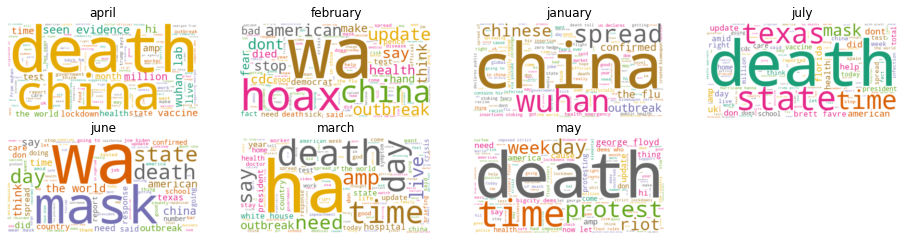

In [112]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ["april", "february", "january", "july", "june", "march", "may"]


# Create subplots for each comedian
for index, month in enumerate(data.columns):
    wc.generate(data_clean.text[month])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings

* In the first month, news began to spread about the source of the virus, which is China, and that it was confirmed
* In next month a lot of people thought it was a hoax
* Death word was used a lot In the months that follow
* An important note is that in the fifth month most of the words used were related to protest, riot and George floyd